<a href="https://colab.research.google.com/github/92sara/Learn_Data_Science_in_3_Months/blob/master/Xfields_Reproduce_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ✌️ Prerequisites

In [ ]:
%%capture
!pip uninstall -y tensorflow

!pip install tensorflow-gpu==1.14.0

In [ ]:
!pip install tensorlayer==1.11.1

     |████████████████████████████████| 317kB 16.7MB/s 
     |████████████████████████████████| 61kB 9.7MB/s 
     |████████████████████████████████| 25.4MB 129kB/s 
     |████████████████████████████████| 31.2MB 111kB/s 
     |████████████████████████████████| 13.0MB 257kB/s 
     |████████████████████████████████| 13.9MB 258kB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
     |████████████████████████████████| 5.4MB 51.1MB/s 
     |████████████████████████████████| 61kB 10.6MB/s 
  Created wheel for wrapt: filename=wrapt-1.10.11-cp36-cp36m-linux_x86_64.whl size=65131 sha256=9bafff5711b89484f52674de855444dd9dab0640332a8bbd7b2e9462ff053318
  Stored in directory: /root/.cache/pip/wheels/48/5d/04/22361a593e70d23b1f7746d932802efe1f0e523376a74f321e
Successfully built wrapt
ERROR: fancyimpute 0.4.3 requires tensorflow, which is not installed.
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.15.4 which is incompatible.
ERROR: umap-learn 0.4.6 has requi

Make sure to Restart Runtime in order to use newly installed versions.

In [ ]:
%%capture
!pip install wandb

# 👊 Fork the repo

In [ ]:
!git clone https://github.com/ayulockin/xfields

Cloning into 'xfields'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 37 (delta 13), reused 25 (delta 7), pack-reused 0
Unpacking objects: 100% (37/37), done.


# 👌 Download Dataset

In [ ]:
#@title 📹 Choose your dataset
import requests, zipfile, io

def download_and_extract(zip_file_url, extract_path):
    r = requests.get(zip_file_url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall(extract_path)
    
dataset_zip_url = ['https://xfields.mpi-inf.mpg.de/dataset/time.zip', 
                   'https://xfields.mpi-inf.mpg.de/dataset/light.zip',
                   'https://xfields.mpi-inf.mpg.de/dataset/view.zip',
                   'https://xfields.mpi-inf.mpg.de/dataset/view_light_time.zip']

zip_dict = {
    'TIME': dataset_zip_url[0],
    'LIGHT': dataset_zip_url[1],
    'VIEW': dataset_zip_url[2],
    'VIEW_LIGHT_TIME': dataset_zip_url[3]
}

selector = "VIEW" #@param ['TIME', 'LIGHT', 'VIEW', 'VIEW_LIGHT_TIME']
zip_file_url = zip_dict[selector]

extract_path = 'xfields/dataset/'

download_and_extract(zip_file_url, extract_path)

%cd xfields/

# 👏 Train

Please select the command based on your choice of dataset.

* Example for view interpolation:

`python train.py --dataset dataset/view/island  --type view  --dim 5 5 --factor 2 --num_n 2 --nfg 8 --sigma 0.5 --br 1 --savepath results/`

* Example for time interpolation:

`python train.py --dataset dataset/time/juice   --type time  --dim 3  --factor 6  --num_n 2 --nfg 8 --sigma 0.5 --savepath results/`

* Example for light interpolation:

`python train.py --dataset dataset/light/eiffel --type light --dim 1 4 --factor 6 --num_n 2 --nfg 4 --sigma 0.5 --savepath results/`

* Example for view-light-time interpolation:

`python train.py --dataset dataset/view_light_time/3x3x3/pomegranate  --type light view time --dim 3 3 3 --factor 6 --num_n 2 --nfg 4  --sigma 0.1 --savepath results/`



In [ ]:
!python train.py --dataset dataset/view/island  --type view  --dim 5 5 --factor 2 --num_n 2 --nfg 8 --sigma 0.5 --br 1 --savepath results/



ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'
---------- Initialize W&B run for experiment tracking----------

wandb: Currently logged in as: ayush-thakur (use `wandb login --relogin` to force relogin)
wandb: Tracking run with wandb version 0.10.14
wandb: Syncing run treasured-feather-25
wandb: ⭐️ View project at https://wandb.ai/wandb/xfields
wandb: 🚀 View run at https://wandb.ai/wandb/xfields/runs/wdext9p1
wandb: Run data is saved locally in /content/xfields/wandb/run-20210124_173108-wdext9p1
wandb: Run `wandb offline` to turn off syncing.

---------- Perform Training ----------
creating directory results/island/trained model
creating directory results/island/saved training
XField type: ['view']
Dimension of input xfield: [5, 5]
Dataset path: dataset/view/island
Downsampling factor: 2
Output resolution: 882 x 882
 Reading image 25 out of 25  
 ------- Creating the model -------
Number of learnable parameters (decoder): 483042
------------ Start Training ------

# 🤘 Test

Please select the command based on your choice of dataset.

* Example for view interpolation:

`python test.py --dataset dataset/view/island  --type view --dim 5 5  --factor 2 --num_n 4 --nfg 8  --sigma 0.5 --br 1  --scale 90 --fps 90 --savepath results/`

 * Example for time interpolation:

`python test.py --dataset dataset/time/juice   --type time  --dim 3   --factor 6 --num_n 2 --nfg 8  --sigma 0.5 --scale 90 --fps 30 --savepath results/`

* Example for light interpolation:

`python test.py --dataset dataset/light/eiffel --type light --dim 1 4 --factor 6 --num_n 2 --nfg 4  --sigma 0.5  --scale 30 --fps 60 --savepath results/`

* Example for view-light-time interpolation:

`python test.py --dataset dataset/view_light_time/3x3x3/pomegranate  --type light view time --dim 3 3 3 --factor 6 --num_n 8 --nfg 4 --sigma 0.1 --scale 90 --fps 90 --savepath results/`



In [ ]:
!python test.py --dataset dataset/light/angel --type light --dim 1 4 --factor 6 --num_n 2 --nfg 4  --sigma 0.5  --scale 30 --fps 60 --savepath results/

%cd content



ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'
---------- Initialize W&B run for experiment tracking----------

wandb: Currently logged in as: ayush-thakur (use `wandb login --relogin` to force relogin)
wandb: Tracking run with wandb version 0.10.14
wandb: Syncing run pretty-dust-24
wandb: ⭐️ View project at https://wandb.ai/wandb/xfields
wandb: 🚀 View run at https://wandb.ai/wandb/xfields/runs/17y1gqqt
wandb: Run data is saved locally in /content/xfields/wandb/run-20210124_172848-17y1gqqt
wandb: Run `wandb offline` to turn off syncing.

---------- Perform Testing ----------
creating directory results/angel/rendered videos
XField type: ['light']
Dimension of input xfield: [1, 4]
output video fps: 60
number of intermediate points for interpolation: 30
Dataset path: dataset/light/angel
Downsampling factor: 6
Output resolution: 504 x 504
 Reading image 5 out of 5  
 loading pretrained model  results/angel/trained model/model.ckpt
 interpolated image 62 of 62 
 The i

### Click on the W&B run page to see the training metrics. 

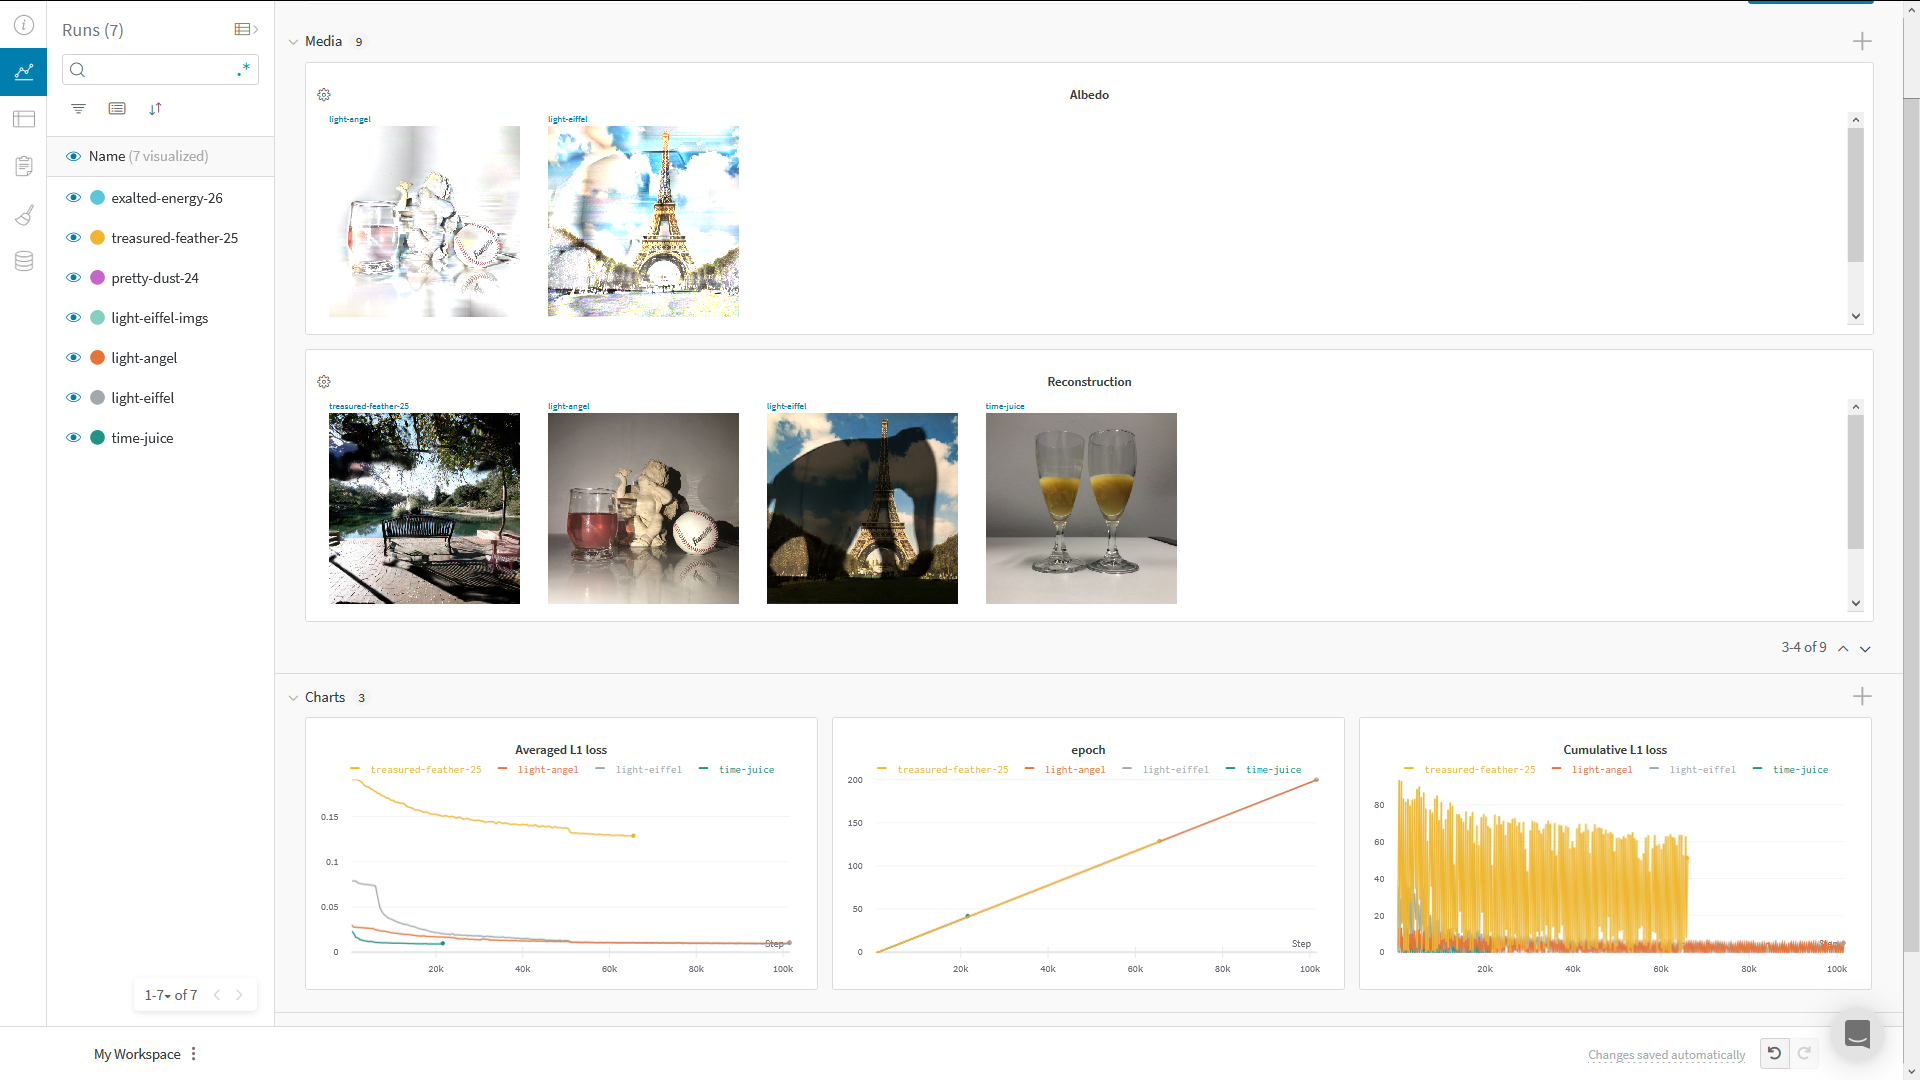